In [ ]:
Nguồn: https://nguyenvanhieu.vn/thuat-toan-phan-cum-k-means/

# Thuật toán K-means là gì?

- K-means là một thuật toán phân cụm đơn giản thuộc loại học không giám sát(tức là dữ liệu không có nhãn) và được sử dụng để giải quyết bài toán phân cụm. Ý tưởng của thuật toán phân cụm k-means là phân chia 1 bộ dữ liệu thành các cụm khác nhau. Trong đó số lượng cụm được cho trước là k.
- Công việc phân cụm được xác lập dựa trên nguyên lý: Các điểm dữ liệu trong cùng 1 cụm thì phải có cùng 1 số tính chất nhất định. 

# Các bước của thuật toán K-means
1. Khởi tạo K điểm dữ liệu trong bộ dữ liệu và tạm thời coi nó là tâm của các cụm dữ liệu của chúng ta.2. 
Với mỗi điểm dữ liệu trong bộ dữ liệu, tâm cụm của nó sẽ được xác định là 1 trong K tâm cụm gần nó nhất
3. 
Sau khi tất cả các điểm dữ liệu đã có tâm, tính toán lại vị trí của tâm cụm để đảm bảo tâm của cụm nằm ở chính giữa cụ
4. .
Bước 2 và bước 3 sẽ được lặp đi lặp lại cho tới khi vị trí của tâm cụm không thay đổi hoặc tâm của tất cả các điểm dữ liệu không thay đổi.

# Một số vấn đề khi sử dụng thuật toán K-means
1. Lựa chọn số lượng cụm: Không có công thức tính mà chỉ có cách duyệt từ từ các giá trị k.
2. Khởi tạo k vị trí ban đầu: Cố gắng khởi tạo k tâm cụm này phân bố đồng đều trên không gian của bộ dữ liệu.
3. Tính dừng (Hội tụ): Đối với những trường hợp dữ liệu phức tạp, thuật toán k-means sẽ rất lâu hoặc không bao giờ hội tụ. Tức là sẽ không bao giờ xác định được tâm cụm cố định để kết thúc bài toán. Hoặc là phải chạy qua rất nhiều bước lặp. Trong những trường hợp như vậy, thay vì phải tìm được k tâm cụm cố định thì ta sẽ dừng bài toán khi sự thay đổi ở một con số chấp nhận được.

## Bài toán: Có 1 tập hợp các điểm trên không gian tọa độ Oxy. Mỗi điểm sẽ có tọa độ (x, y) xác định. Bài toán cần giải quyết là chia các điểm này thành K cụm khác nhau phân biệt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

#### Chú thích: 

1. np.random.multivariate_normal(mean, cov[, size, check_valid, tol): tạo ra một mẫu ngẫu nhiên từ một phân phối chuẩn nhiều chiều:
- mean: Mảng 1 chiều chứa các giá trị trung bình của các biến ngẫu nhiên.
- cov: Mảng 2 chiều chứa ma trận hiệp phương sai.
- size: Kích thước của mẫu ngẫu nhiên cần tạo ra.
- check_valid: Kiểm tra tính hợp lệ của ma trận hiệp phương sai (‘warn’, ‘raise’, or ‘ignore’).
- tol: Ngưỡng cho phép cho eigenvalues của ma trận hiệp phương sai.

In [5]:
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

np.random.seed(0)
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

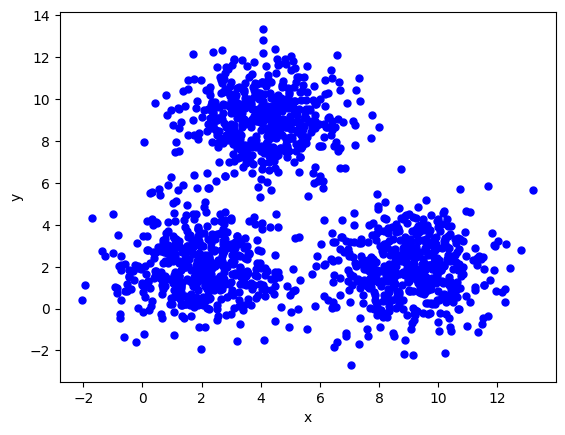

In [3]:
%matplotlib inline

plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot();

# Chú thích:
1. n_cluster tâm cụm bằng cách lấy ngẫu nhiên n_cluster điểm dữ liệu của tập dữ liệu

In [7]:
def kmeans_init_centers(X, n_cluster):
  return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

# Chú thích:
1. kmeans_predict_labels: Với mỗi điểm dữ liệu trong tập dữ liệu, tâm cụm của nó sẽ là 1 trong số n_cluster tâm cụm gần với nó nhất. Việc tính toán khoảng cách giữa 2 điểm trong bài này sử dụng Euclidean distance. (Thực tế có thể dùng bất kỳ phương pháp nào khác)

In [6]:
def kmeans_predict_labels(X, centers):
  D = cdist(X, centers)
  # return index of the closest center
  return np.argmin(D, axis = 1)

# Chú thích: 
1. kmeans_update_center: Việc tính toán lại tọa độ của mỗi tâm cụm được thực hiện đơn giản bằng cách lấy trung bình cộng tọa độ của tất cả các điểm dữ liệu của cụm. Sau khi tính toán xong, vị trí mới của tâm cụm sẽ nằm chính giữa cụm của nó.

In [9]:
def kmeans_update_centers(X, labels, n_cluster):
  centers = np.zeros((n_cluster, X.shape[1]))
  for k in range(n_cluster):
    # collect all points assigned to the k-th cluster 
    Xk = X[labels == k, :]
    # take average
    centers[k,:] = np.mean(Xk, axis = 0)
  return centers

# Chú thích:
1. kmeans_has_converged: Nếu việc cập nhật lại vị trí của các tâm cụm không có thay đổi gì thì có nghĩa là chúng ta đã có thể dừng và đưa ra kết quả. Nghĩa là tọa độ cũ và tọa độ sau khi cập nhật của các tâm cụm là như nhau
2. kmeans_visualize: Mô hình hóa hàm kmeans_has_converged

In [10]:
def kmeans_has_converged(centers, new_centers):
  # return True if two sets of centers are the same
  return (set([tuple(a) for a in centers]) == 
      set([tuple(a) for a in new_centers]))

def kmeans_visualize(X, centers, labels, n_cluster, title):
  plt.xlabel('x') # label trục x
  plt.ylabel('y') # label trục y
  plt.title(title) # title của đồ thị
  plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
 
  for i in range(n_cluster):
    data = X[labels == i] # lấy dữ liệu của cụm i
    plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
  plt.legend() # Hiện bảng chú thích
  plt.show()


    

In [11]:
def kmeans(init_centes, init_labels, X, n_cluster):
  centers = init_centes
  labels = init_labels
  times = 0
  while True:
    labels = kmeans_predict_labels(X, centers)
    kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
    new_centers = kmeans_update_centers(X, labels, n_cluster)
    if kmeans_has_converged(centers, new_centers):
      break
    centers = new_centers
    kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
    times += 1
  return (centers, labels, times)

[[ 8.56731772  1.37990347]
 [ 3.2853403   6.14571841]
 [ 5.14514632 10.52725337]]


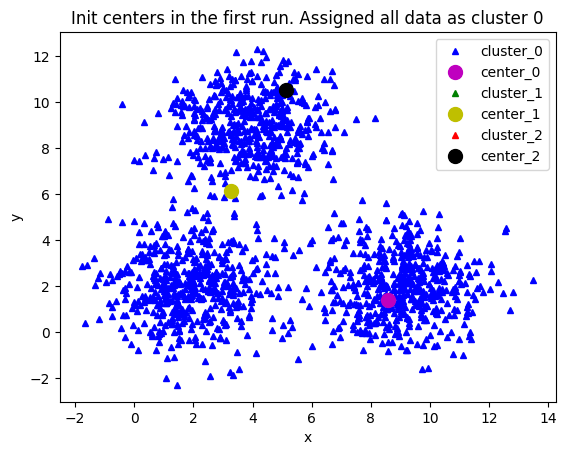

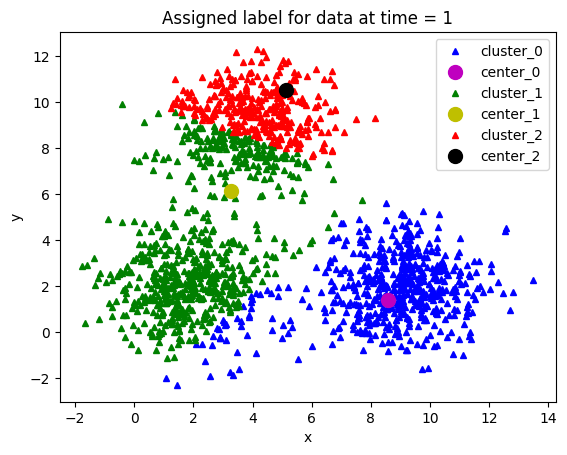

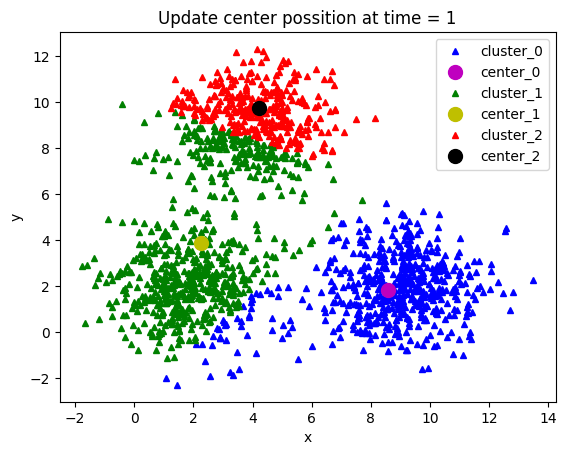

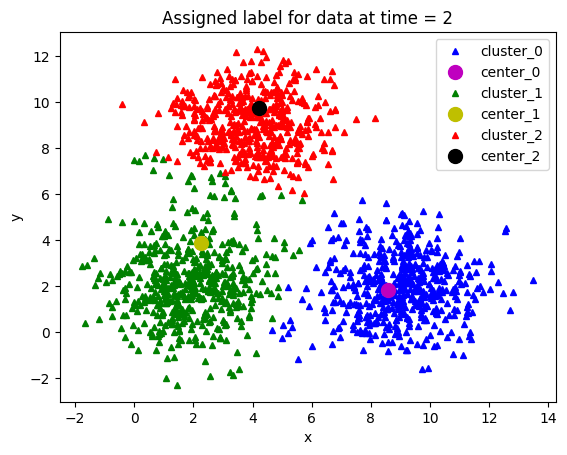

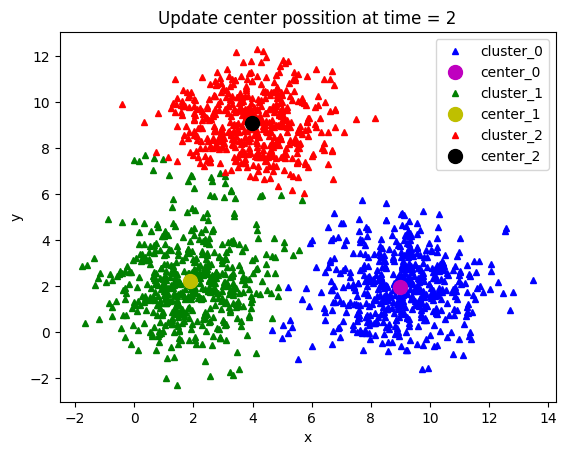

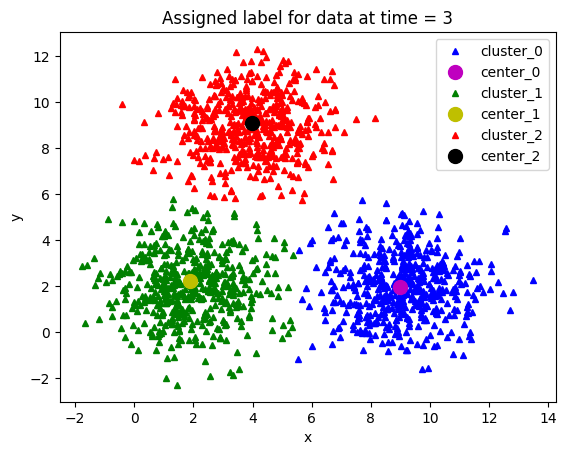

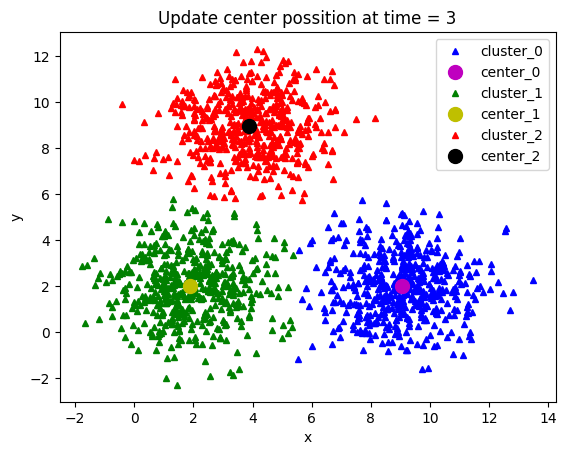

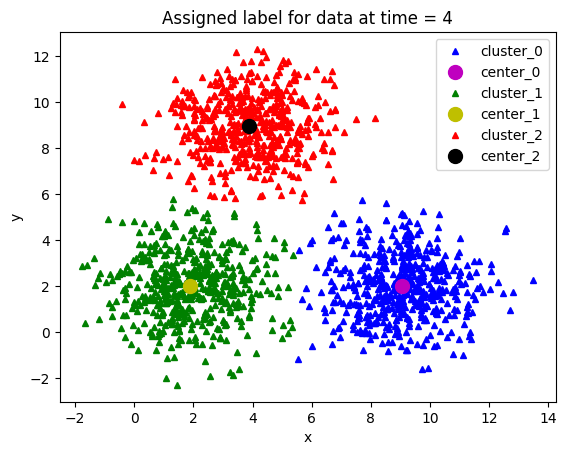

Done! Kmeans has converged after 3 times


In [13]:
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')

# Ví dụ minh họa bằng sklearn.

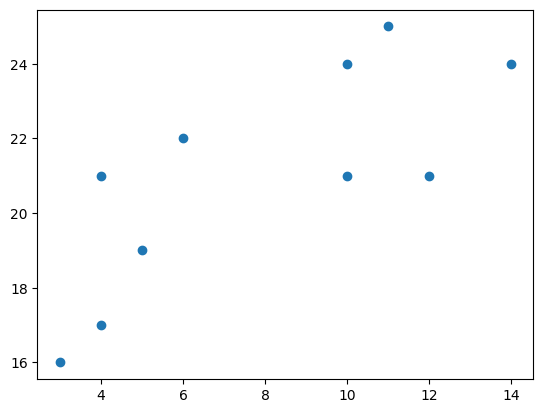

In [29]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

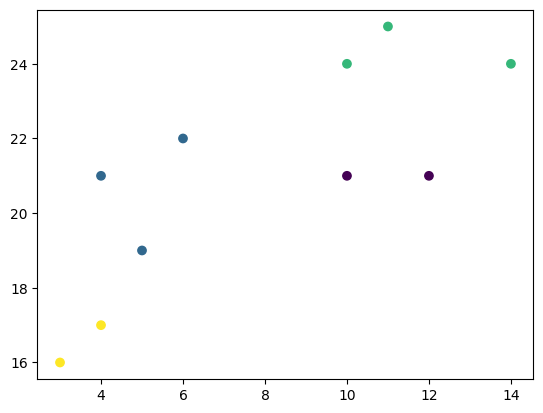

In [30]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

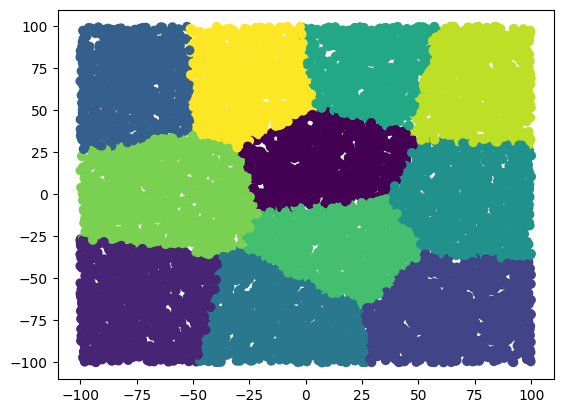

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random


n = 10000
random.seed(42)
x = [random.uniform(-100, 100) for _ in range(n)]
y = [random.uniform(-100, 100) for _ in range(n)]
data = list(zip(x, y))

model = KMeans(n_clusters = 11)
model.fit(data)

plt.scatter(x, y, c=model.labels_)
plt.show()

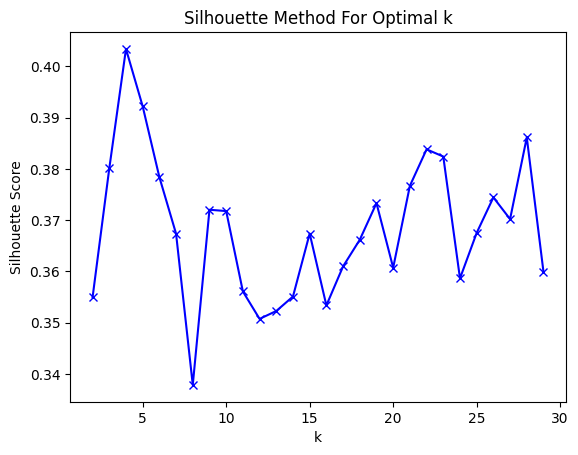

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score

n = 1000
random.seed(42)
x = [random.uniform(1, 100) for _ in range(n)]
y = [random.uniform(1, 100) for _ in range(n)]
data = list(zip(x, y))

silhouette_scores = []
K = range(2, 30)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(data)
    silhouette_scores.append(silhouette_score(data, model.labels_))

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()